# Data loading

Este JN apresenta a receita para baixar os dadasets usados na disciplina ICCD - IME - USP.

In [12]:
!pip install git+https://github.com/rmcesarjr/iccd.git

!pip install --upgrade --force-reinstall git+https://github.com/rmcesarjr/iccd.git



  Cloning https://github.com/rmcesarjr/iccd.git to /tmp/pip-req-build-w0wdopgr
  Running command git clone --filter=blob:none --quiet https://github.com/rmcesarjr/iccd.git /tmp/pip-req-build-w0wdopgr
  Resolved https://github.com/rmcesarjr/iccd.git to commit fb5ae8d12e88027885107b0d3b2ebe3499e17a5d
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/rmcesarjr/iccd.git to /tmp/pip-req-build-1qjfj1l8
  Running command git clone --filter=blob:none --quiet https://github.com/rmcesarjr/iccd.git /tmp/pip-req-build-1qjfj1l8
  Resolved https://github.com/rmcesarjr/iccd.git to commit fb5ae8d12e88027885107b0d3b2ebe3499e17a5d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 68.4 MB/s eta 0:00:00


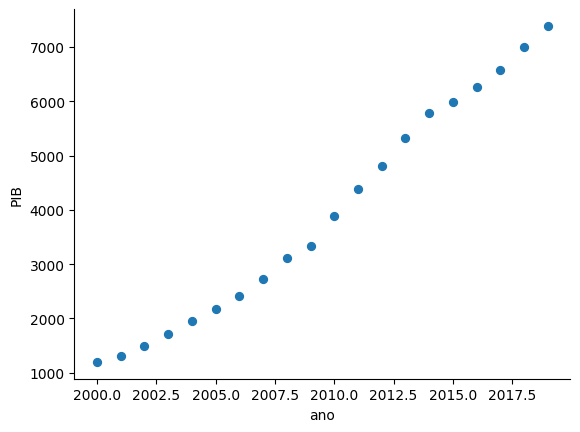

In [ ]:
from matplotlib import pyplot as plt
import iccd

def main():
  df = iccd.dataload('pib')
  df.head()
  df.plot(kind='scatter', x='ano', y='PIB', s=32)
  plt.gca().spines[['top', 'right',]].set_visible(False)

main()

In [ ]:
from matplotlib import pyplot as plt
import iccd

def main():
  df = iccd.dataload('cidades')
  df.head()
  print(df)

main()

                     Cidade  População
0                 São Paulo   12396372
1            Rio de Janeiro    6775561
2                  Brasília    3055149
3                  Salvador    2886698
4                 Fortaleza    2669342
5            Belo Horizonte    2530701
6                    Manaus    2256230
7                  Curitiba    1963726
8                    Recife    1653461
9                   Goiânia    1555626
10                    Belém    1499641
11             Porto Alegre    1492530
12                Guarulhos    1392128
13                 Campinas    1213792
14                 São Luís    1118721
15              São Gonçalo    1091737
16                   Maceió    1029129
17          Duque de Caxias    1006281
18                    Natal     998066
19                 Teresina     868075
20              Nova Iguaçu     862225
21             Campo Grande     897938
22    São Bernardo do Campo     844483
23              João Pessoa     833932
24              Santo And

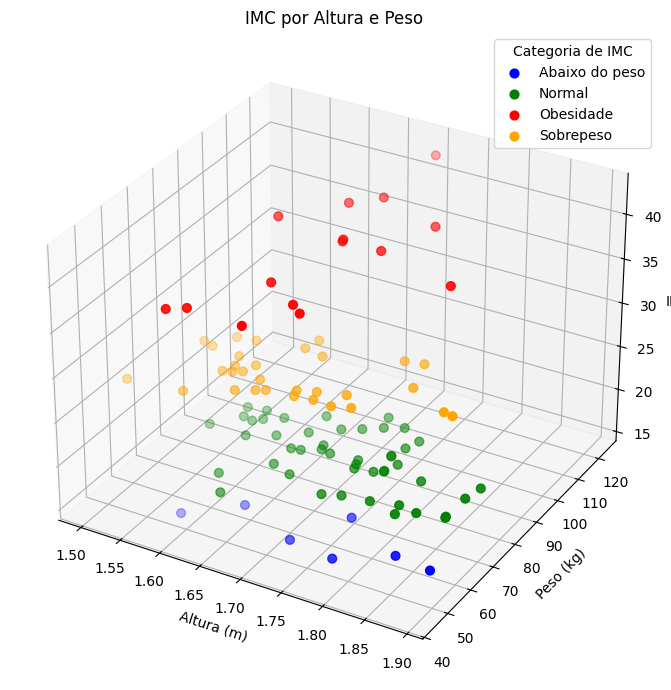

In [3]:
import iccd
from matplotlib import pyplot as plt


def classifica_imc(imc):
    if imc < 18.5:
        return "Abaixo do peso"
    elif imc < 25:
        return "Normal"
    elif imc < 30:
        return "Sobrepeso"
    else:
        return "Obesidade"

def main():
  df = iccd.dataload('peso_altura')
  # Calcular IMC e classificar
  df["IMC"] = df["Peso (kg)"] / df["Altura (m)"]**2

  df["Categoria"] = df["IMC"].apply(classifica_imc)

  cores = {
      "Abaixo do peso": "blue",
      "Normal": "green",
      "Sobrepeso": "orange",
      "Obesidade": "red"
  }
  df["Cor"] = df["Categoria"].map(cores)

  # Gráfico 3D dos pontos
  fig = plt.figure(figsize=(10, 7))
  ax = fig.add_subplot(111, projection='3d')

  for categoria, grupo in df.groupby("Categoria"):
      ax.scatter(grupo["Altura (m)"], grupo["Peso (kg)"], grupo["IMC"],
                label=categoria, color=cores[categoria], s=40)

  ax.set_xlabel("Altura (m)")
  ax.set_ylabel("Peso (kg)")
  ax.set_zlabel("IMC")
  ax.set_title("IMC por Altura e Peso")
  ax.legend(title="Categoria de IMC")

  plt.tight_layout()
  plt.show()

main()